To perform a thorough exploratory data analysis (EDA) on the `application_train.csv` file for building a credit risk model, we will proceed with the following steps:

1. **Load the Data**: Read the `application_train.csv` file into dataframe to explore it's contents.

2. **Understand the Metadata**: Use `HomeCredit_columns_description.csv` to understand what each column in `application_train.csv` represents.

3. **Preliminary Data Inspection**: 
    - Check the shape of the dataset.
    - View the first few rows to understand the structure and contents.
    - Check for duplicate entries.

4. **Feature Engineering**: 
    - Create new features if applicable.

5. **Data Cleaning/ Missing Values Analysis**: 
    - Handle missing values.
    - Identify the columns with missing values.
    - Determine the best strategy for handling missing data.
    - Correct data types if necessary.

6. **Target Variable Analysis**: 
    - Analyze the distribution of the `TARGET` variable.

7. **Feature Analysis**: 
    - Analyze the distributions and relationships of the features with the target.
    - Perform univariate analysis.
    - Perform bivariate analysis.

8. **Correlation Analysis**: 
    - Check the correlation of features with the target and among themselves.

9. **Outlier Detection**: 
    - Detect and handle outliers in the dataset.

10. **Feature Elimination**: 
    - Eliminate features using different techniques

**Data Visualization**: 
- Use visualizations to understand the data better.



In [ ]:
import matplotlib.pyplot as plt 
import numpy as np  
import pandas as pd  
import seaborn as sns  
import warnings 

from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

from typing import Tuple, List, Dict, Any

warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Load the application data

In [76]:
application_train_path = './home-credit-default-risk/application_train.csv'
application_train_df = pd.read_csv(application_train_path)

# Display the first few rows of the application data and the columns description
application_train_df.shape


(307511, 122)

In [77]:
application_train_df.DAYS_EMPLOYED.max()

365243

In [78]:
temp = pd.read_csv("./home-credit-default-risk/HomeCredit_columns_description.csv", encoding = "latin")
temp

Unnamed: 0                         Table                           Row  \
0             1  application_{train|test}.csv                    SK_ID_CURR   
1             2  application_{train|test}.csv                        TARGET   
2             5  application_{train|test}.csv            NAME_CONTRACT_TYPE   
3             6  application_{train|test}.csv                   CODE_GENDER   
4             7  application_{train|test}.csv                  FLAG_OWN_CAR   
5             8  application_{train|test}.csv               FLAG_OWN_REALTY   
6             9  application_{train|test}.csv                  CNT_CHILDREN   
7            10  application_{train|test}.csv              AMT_INCOME_TOTAL   
8            11  application_{train|test}.csv                    AMT_CREDIT   
9            12  application_{train|test}.csv                   AMT_ANNUITY   
10           13  application_{train|test}.csv               AMT_GOODS_PRICE   
11           14  application_{train|test}.csv               NAME_TYPE_SUITE   
12           15  application_{train|test}.csv              NAME_INCOME_TYPE   
13           16  application_{train|test}.csv           NAME_EDUCATION_TYPE   
14           17  application_{train|test}.csv            NAME_FAMILY_STATUS   
15           18  application_{train|test}.csv             NAME_HOUSING_TYPE   
16           19  application_{train|test}.csv    REGION_POPULATION_RELATIVE   
17           20  application_{train|test}.csv                    DAYS_BIRTH   
18           21  application_{train|test}.csv                 DAYS_EMPLOYED   
19           22  application_{train|test}.csv             DAYS_REGISTRATION   
20           23  application_{train|test}.csv               DAYS_ID_PUBLISH   
21           24  application_{train|test}.csv                   OWN_CAR_AGE   
22           25  application_{train|test}.csv                    FLAG_MOBIL   
23           26  application_{train|test}.csv                FLAG_EMP_PHONE   
24           27  application_{train|test}.csv               FLAG_WORK_PHONE   
25           28  application_{train|test}.csv              FLAG_CONT_MOBILE   
26           29  application_{train|test}.csv                    FLAG_PHONE   
27           30  application_{train|test}.csv                    FLAG_EMAIL   
28           31  application_{train|test}.csv               OCCUPATION_TYPE   
29           32  application_{train|test}.csv               CNT_FAM_MEMBERS   
30           33  application_{train|test}.csv          REGION_RATING_CLIENT   
31           34  application_{train|test}.csv   REGION_RATING_CLIENT_W_CITY   
32           35  application_{train|test}.csv    WEEKDAY_APPR_PROCESS_START   
33           36  application_{train|test}.csv       HOUR_APPR_PROCESS_START   
34           37  application_{train|test}.csv    REG_REGION_NOT_LIVE_REGION   
35           38  application_{train|test}.csv    REG_REGION_NOT_WORK_REGION   
36           39  application_{train|test}.csv   LIVE_REGION_NOT_WORK_REGION   
37           40  application_{train|test}.csv        REG_CITY_NOT_LIVE_CITY   
38           41  application_{train|test}.csv        REG_CITY_NOT_WORK_CITY   
39           42  application_{train|test}.csv       LIVE_CITY_NOT_WORK_CITY   
40           43  application_{train|test}.csv             ORGANIZATION_TYPE   
41           44  application_{train|test}.csv                  EXT_SOURCE_1   
42           45  application_{train|test}.csv                  EXT_SOURCE_2   
43           46  application_{train|test}.csv                  EXT_SOURCE_3   
44           47  application_{train|test}.csv                APARTMENTS_AVG   
45           48  application_{train|test}.csv              BASEMENTAREA_AVG   
46           49  application_{train|test}.csv   YEARS_BEGINEXPLUATATION_AVG   
47           50  application_{train|test}.csv               YEARS_BUILD_AVG   
48           51  application_{train|test}.csv                COMMONAREA_AVG   
49           52  application_{train|test}.csv          

# Preliminary data inspection

In [79]:
# Check the shape of the dataset
data_shape = application_train_df.shape

# Check for duplicate entries based on the unique ID
duplicate_entries = application_train_df.duplicated(subset='SK_ID_CURR').sum()

# Check for missing values
missing_values = application_train_df.isnull().sum().sort_values(ascending=False)

# Check the balance of the TARGET variable
target_balance = application_train_df['TARGET'].value_counts(normalize=True)

# Get basic statistics
basic_stats = application_train_df.describe()

(data_shape, duplicate_entries, missing_values.head(20), target_balance, basic_stats)


((307511, 122),
 0,
 COMMONAREA_MEDI             214865
 COMMONAREA_AVG              214865
 COMMONAREA_MODE             214865
 NONLIVINGAPARTMENTS_MODE    213514
 NONLIVINGAPARTMENTS_AVG     213514
 NONLIVINGAPARTMENTS_MEDI    213514
 FONDKAPREMONT_MODE          210295
 LIVINGAPARTMENTS_MODE       210199
 LIVINGAPARTMENTS_AVG        210199
 LIVINGAPARTMENTS_MEDI       210199
 FLOORSMIN_AVG               208642
 FLOORSMIN_MODE              208642
 FLOORSMIN_MEDI              208642
 YEARS_BUILD_MEDI            204488
 YEARS_BUILD_MODE            204488
 YEARS_BUILD_AVG             204488
 OWN_CAR_AGE                 202929
 LANDAREA_MEDI               182590
 LANDAREA_MODE               182590
 LANDAREA_AVG                182590
 dtype: int64,
 TARGET
 0    0.919271
 1    0.080729
 Name: proportion, dtype: float64,
           SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
 count  307511.000000  307511.000000  307511.000000      3.075110e+05   
 mean   278180.518577     

In [80]:
df_train = application_train_df.copy()

# Feature Engineering

In [81]:
# Create new features in the DataFrame
df_train = df_train.assign(
    # Flag for erroneous 'DAYS_EMPLOYED' values and replace them with NaN
    DAYS_EMPLOYED_ERROR = df_train["DAYS_EMPLOYED"] == 365243,
    DAYS_EMPLOYED = lambda x: x['DAYS_EMPLOYED'].replace(365243, np.nan),
    # Flag when total income is greater than credit
    INCOME_GT_CREDIT_FLAG = df_train['AMT_INCOME_TOTAL'] > df_train['AMT_CREDIT'],
    # New features related to income, credit, annuity, and employment
    CREDIT_INCOME_PERCENT = lambda x: x['AMT_CREDIT'] / x['AMT_INCOME_TOTAL'],
    ANNUITY_INCOME_PERCENT = lambda x: x['AMT_ANNUITY'] / x['AMT_INCOME_TOTAL'],
    CREDIT_TERM = lambda x: x['AMT_CREDIT'] / x['AMT_ANNUITY'],
    DAYS_EMPLOYED_PERCENT = lambda x: x['DAYS_EMPLOYED'] / x['DAYS_BIRTH'],
)

# Display the shape of the updated DataFrame
print(f'The shape of application data: {df_train.shape}')

The shape of application data: (307511, 128)


In [82]:
bureau = pd.read_csv("./home-credit-default-risk/bureau.csv")
bureau.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

In [83]:
# Function to prefix columns and merge with main DataFrame

def merge_bureau_features(
    df_main: pd.DataFrame, 
    bureau: pd.DataFrame, 
    prefix: str, 
    agg_func: Dict[str, Any], 
    on: str = 'SK_ID_CURR'
) -> pd.DataFrame:
    """
    Merges aggregated bureau features into the main DataFrame.

    Parameters:
    df_main (pd.DataFrame): Main DataFrame to which features should be merged.
    bureau (pd.DataFrame): DataFrame containing the bureau information to be aggregated and merged.
    prefix (str): Prefix to be added to the new feature names.
    agg_func (Dict[str, Any]): Aggregation functions to be applied to the bureau features.
    on (str, optional): The column on which to merge the DataFrames. Defaults to 'SK_ID_CURR'.

    Returns:
    pd.DataFrame: Main DataFrame with the merged bureau features.
    """
    grp = bureau.groupby(on).agg(agg_func).reset_index()
    grp.columns = [f'{prefix}{column}' if column != on else column for column in grp.columns]
    df_main = df_main.merge(grp, on=on, how='left')
    return df_main


# Combining numerical features
numeric_columns = bureau.select_dtypes(include=[np.number]).columns.tolist()
numeric_columns.remove('SK_ID_BUREAU')  # Exclude ID
application_bureau = merge_bureau_features(
    df_train, bureau[numeric_columns], 
    'BUREAU_', {col: 'mean' for col in numeric_columns if col != 'SK_ID_CURR'}
)

# Combining categorical features
categorical_columns = bureau.select_dtypes(exclude=[np.number, 'datetime']).columns.tolist()
bureau_categorical = pd.get_dummies(bureau[categorical_columns])
bureau_categorical['SK_ID_CURR'] = bureau['SK_ID_CURR']
application_bureau = merge_bureau_features(
    application_bureau, bureau_categorical, 
    'BUREAU_', 'sum'
)

print('The shape of application and bureau data combined:', application_bureau.shape)

The shape of application and bureau data combined: (307511, 163)


In [84]:
application_bureau.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461         -637.0            -3648.0   
1                    0.003541      -16765        -1188.0            -1186.0   
2                    0.010032      -19046         -225.0            -4260.0   
3                    0.008019      -19005        -3039.0            -9833.0   
4                    0.028663      -19932        -3038.0            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [85]:
# Function to create and merge additional features

def create_bureau_ratios(bureau: pd.DataFrame, application_bureau: pd.DataFrame) -> pd.DataFrame:
    """
    Create and merge debt to credit and overdue to debt ratios into the application bureau DataFrame.

    Parameters:
    bureau (pd.DataFrame): DataFrame containing bureau data.
    application_bureau (pd.DataFrame): DataFrame to merge the ratios into.

    Returns:
    pd.DataFrame: The application bureau DataFrame with new ratio features merged.
    """
    # Ratios and sum calculations
    debt_credit_ratio = bureau.groupby('SK_ID_CURR')['AMT_CREDIT_SUM_DEBT'].sum() / bureau.groupby('SK_ID_CURR')['AMT_CREDIT_SUM'].sum()
    overdue_debt_ratio = bureau.groupby('SK_ID_CURR')['AMT_CREDIT_SUM_OVERDUE'].sum() / bureau.groupby('SK_ID_CURR')['AMT_CREDIT_SUM_DEBT'].sum()
    
    # Replace infinite values with zeros and convert to float32
    debt_credit_ratio = debt_credit_ratio.replace([np.inf, -np.inf], 0).astype('float32')
    overdue_debt_ratio = overdue_debt_ratio.replace([np.inf, -np.inf], 0).astype('float32')
    
    # Merge with main DataFrame
    application_bureau = application_bureau.merge(
        debt_credit_ratio.rename('DEBT_CREDIT_RATIO').reset_index(), 
        on='SK_ID_CURR', 
        how='left'
    )
    application_bureau = application_bureau.merge(
        overdue_debt_ratio.rename('OVERDUE_DEBT_RATIO').reset_index(), 
        on='SK_ID_CURR', 
        how='left'
    )
    
    # Fill NaN values resulted from the join
    application_bureau['DEBT_CREDIT_RATIO'] = application_bureau['DEBT_CREDIT_RATIO'].fillna(0)
    application_bureau['OVERDUE_DEBT_RATIO'] = application_bureau['OVERDUE_DEBT_RATIO'].fillna(0)
    
    return application_bureau


# Apply function to create and merge ratios
application_bureau = create_bureau_ratios(bureau, application_bureau)

# Print the shape of the combined DataFrame
print('The shape of application and bureau data combined:', application_bureau.shape)


The shape of application and bureau data combined: (307511, 165)


In [86]:
application_bureau.shape

(307511, 165)

In [87]:
application_bureau.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461         -637.0            -3648.0   
1                    0.003541      -16765        -1188.0            -1186.0   
2                    0.010032      -19046         -225.0            -4260.0   
3                    0.008019      -19005        -3039.0            -9833.0   
4                    0.028663      -19932        -3038.0            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [88]:
del bureau
del application_train_df

# Missing Data Analysis/ Data Cleaning

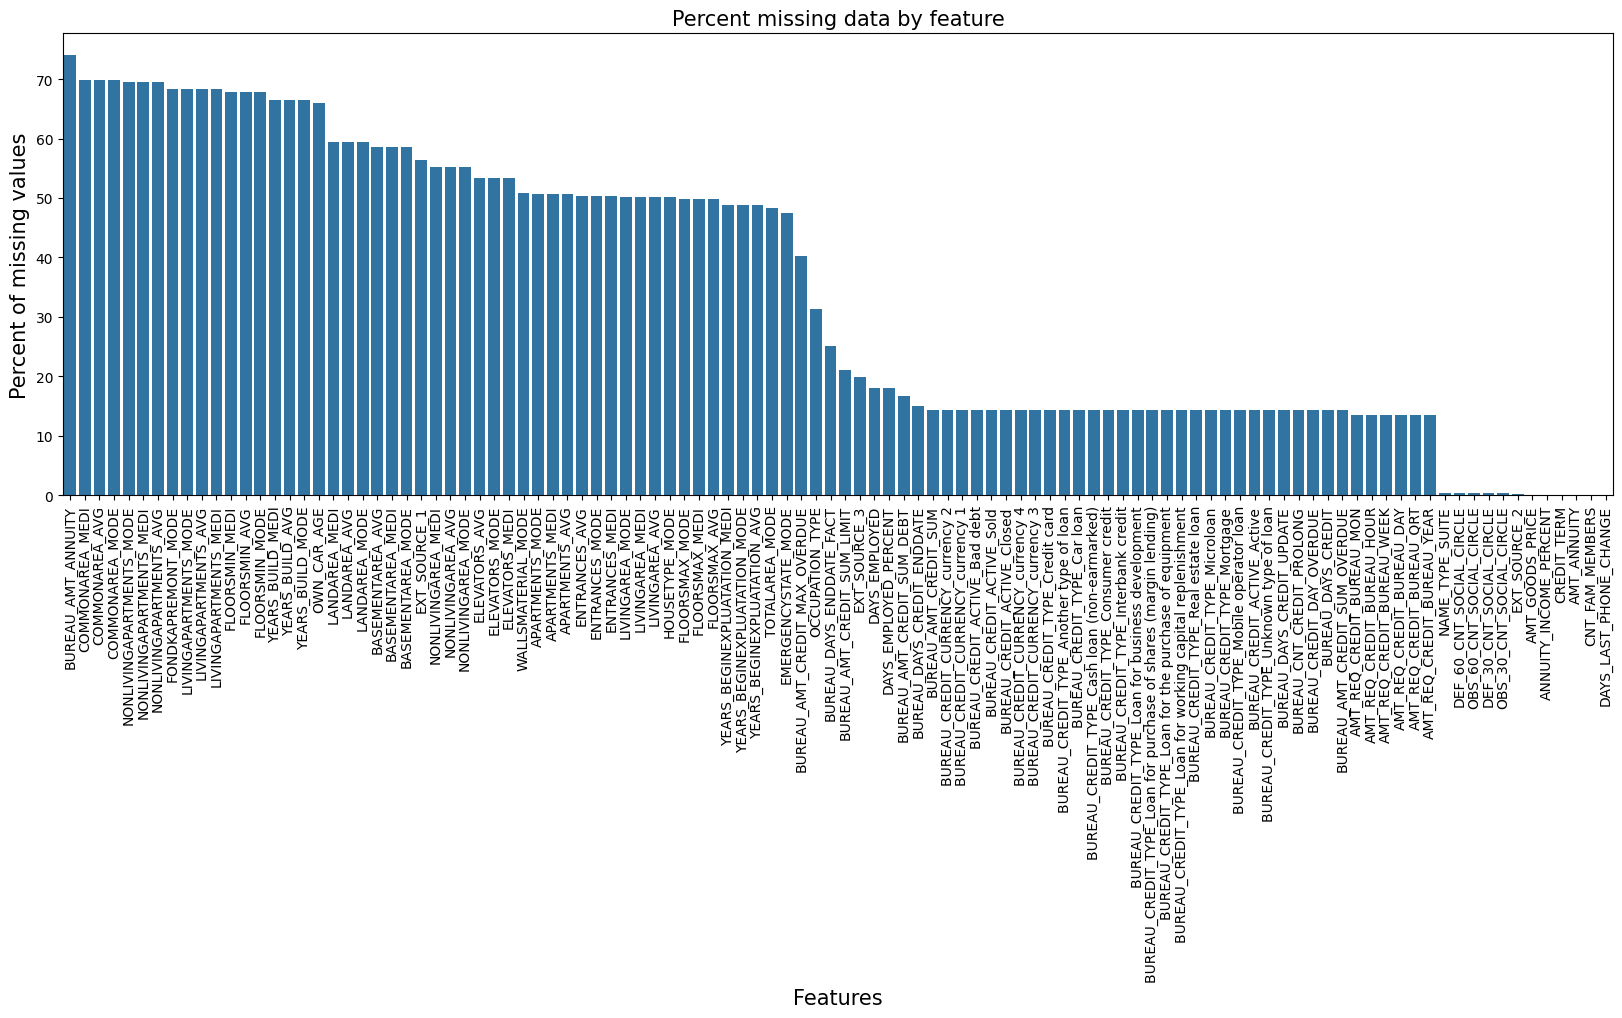

In [89]:
def missing_data_analysis(df: pd.DataFrame) -> Tuple[pd.DataFrame, List[str]]:
    """
    Analyzes the missing data in a DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame to analyze.

    Returns:
    Tuple[pd.DataFrame, List[str]]: A tuple containing the DataFrame with missing data information and a list of columns with missing values.
    """
    # Calculate the percentage of missing values for each column
    missing_data = (df.isnull().sum() / len(df)) * 100
    missing_data = missing_data.drop(missing_data[missing_data == 0].index).sort_values(ascending=False)
    missing_data_df = pd.DataFrame({'Missing Ratio' :missing_data})

    # List of columns with missing data
    missing_columns = list(missing_data.index)

    # Visualize missing data
    plt.figure(figsize=(20, 6))
    sns.barplot(x=missing_data.index, y=missing_data)
    plt.xticks(rotation='vertical')
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)

    return missing_data_df, missing_columns


missing_data_df, missing_columns = missing_data_analysis(application_bureau)
plt.show() 

In [90]:
def drop_missing_data_columns(df: pd.DataFrame, threshold: float = 50.0) -> Tuple[pd.DataFrame, List[str]]:
    """
    Drops columns from a DataFrame based on a threshold for missing data.

    Parameters:
    df (pd.DataFrame): The DataFrame to process.
    threshold (float): The percentage threshold of missing values that will dictate if a column is dropped.

    Returns:
    Tuple[pd.DataFrame, List[str]]: A tuple containing the cleaned DataFrame and a list of dropped columns.
    """
    # Calculate the percentage of missing values for each column
    missing_ratios = df.isnull().mean() * 100

    # Find columns with a missing percentage above the threshold
    columns_to_drop = missing_ratios[missing_ratios > threshold].index.tolist()

    # Drop the columns
    df_dropped = df.drop(columns=columns_to_drop, axis=1)

    return df_dropped, columns_to_drop


df_cleaned, columns_dropped = drop_missing_data_columns(application_bureau, threshold=50.0)
print(f"Dropped columns: {columns_dropped}")


Dropped columns: ['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'BUREAU_AMT_ANNUITY']


In [91]:
def fill_missing_data_with_imputer(df: pd.DataFrame) -> pd.DataFrame:
    """
    Fills missing data using sklearn's SimpleImputer: numerical data with median and categorical data with mode.

    Parameters:
    df (pd.DataFrame): The DataFrame with missing values to fill.

    Returns:
    pd.DataFrame: The DataFrame with missing values filled.
    """
    # Separate the dataframe into numerical and categorical dataframes
    df_numerical = df.select_dtypes(include=['int64', 'float64', 'float32'])
    df_categorical = df.select_dtypes(include=['object', 'category', 'bool'])

    # Imputer for numerical data
    imputer_num = SimpleImputer(strategy='median')
    df_numerical_imputed = pd.DataFrame(imputer_num.fit_transform(df_numerical), columns=df_numerical.columns)
    
    # Imputer for categorical data
    imputer_cat = SimpleImputer(strategy='most_frequent')
    df_categorical_imputed = pd.DataFrame(imputer_cat.fit_transform(df_categorical), columns=df_categorical.columns)
    
    # Combine the dataframes back together
    df_imputed = pd.concat([df_numerical_imputed, df_categorical_imputed], axis=1)

    # Ensure original order of columns is preserved
    df_imputed = df_imputed[df.columns]

    return df_imputed

df_filled = fill_missing_data_with_imputer(df_cleaned)

# Target Variable/ Feature Analysis:

In [92]:
# Identifying numerical and categorical features
numerical_features = df_filled.select_dtypes(include=['int64', 'float64', 'float32']).columns.tolist()[2:]
categorical_features = df_filled.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# Summary statistics of numerical features
numerical_summary = df_filled[numerical_features].describe()

# Analyzing the distribution of numerical features with respect to the TARGET variable

# Plotting distributions of the numerical features with respect to TARGET
fig, axes = plt.subplots(nrows=len(numerical_features), ncols=2, figsize=(15, 4*len(numerical_features)))
for i, feature in enumerate(numerical_features):
    sns.histplot(df_filled[feature], bins=50, kde=False, ax=axes[i, 0])
    sns.boxplot(x='TARGET', y=feature, data=df_filled, ax=axes[i, 1])

plt.tight_layout()
plt.show()


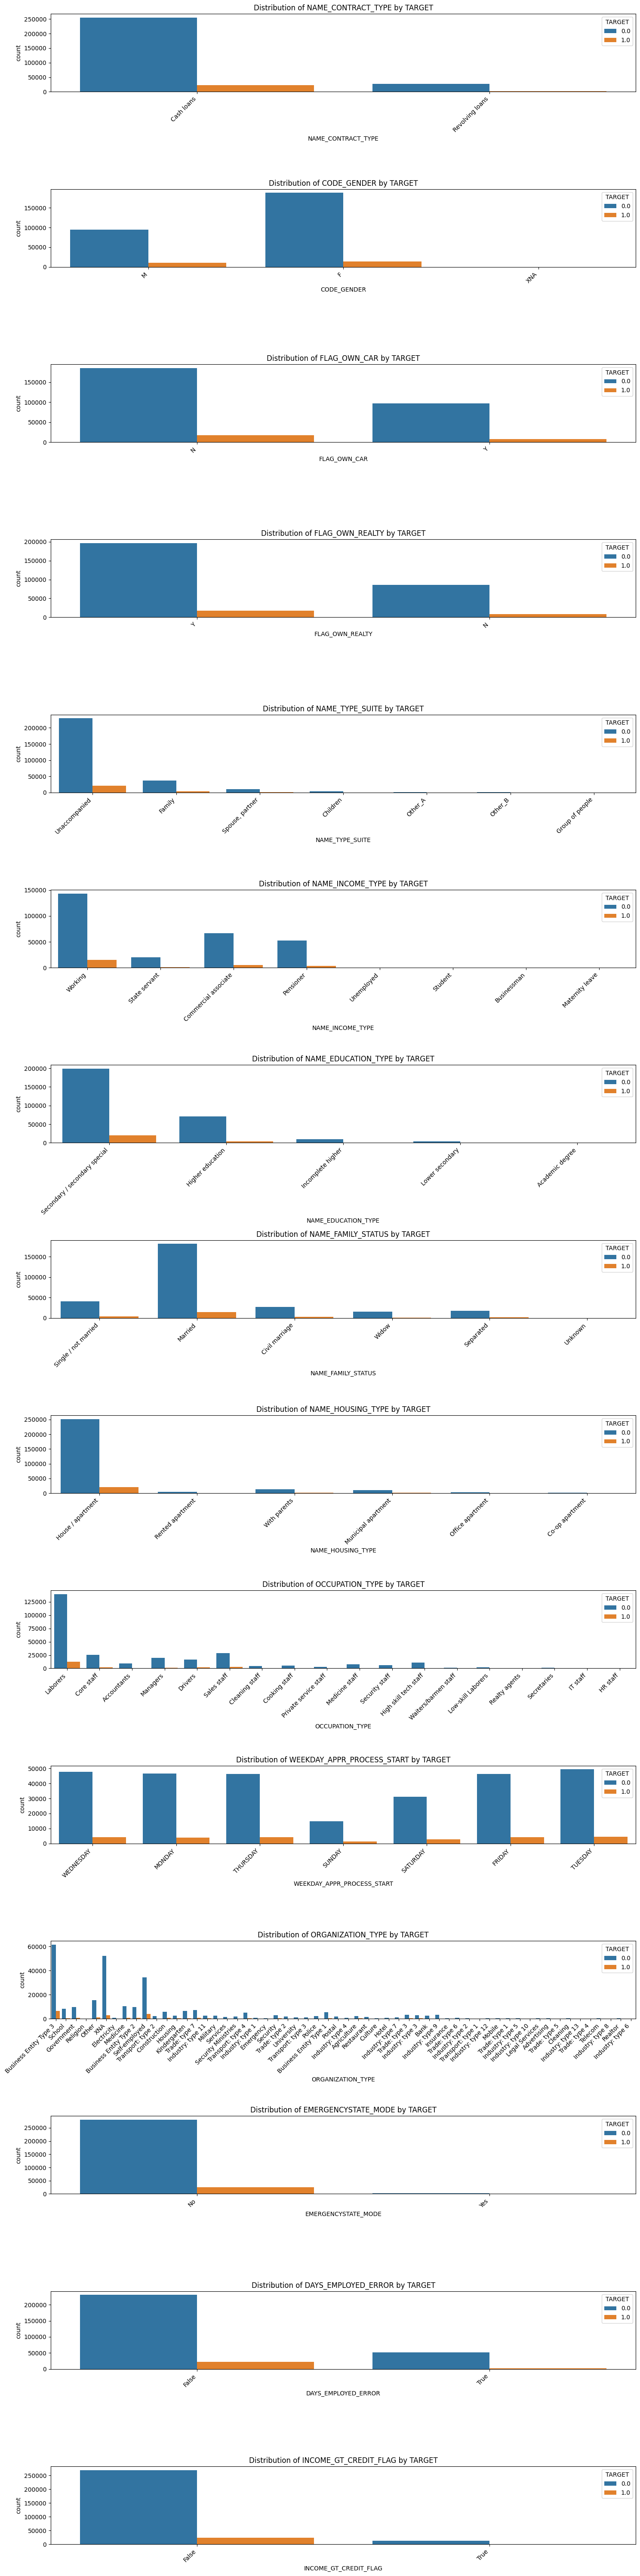

In [93]:
# Plotting the distribution of the categorical features with respect to TARGET
fig, axes = plt.subplots(nrows=len(categorical_features), ncols=1, figsize=(15, 4*len(categorical_features)))
for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, hue='TARGET', data=df_filled, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature} by TARGET')
    axes[i].legend(title='TARGET')
    plt.setp(axes[i].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [94]:
def convert_and_merge_categorical_features(df: pd.DataFrame) -> pd.DataFrame:
    """
    Converts categorical features to numerical using one-hot encoding and merges them with the original dataframe.

    Parameters:
    df (pd.DataFrame): DataFrame containing the features to encode.

    Returns:
    pd.DataFrame: A DataFrame with the original numerical features and one-hot encoded categorical features.
    """
    # Apply one-hot encoding to categorical columns
    df_encoded = pd.get_dummies(df, drop_first=True)
    
    return df_encoded

df_filled = convert_and_merge_categorical_features(df_filled)

# Correlation Analysis

In [ ]:
def correlation_analysis(df: pd.DataFrame, method: str = 'pearson', plot: bool = True, figsize: tuple = (15, 10)) -> pd.DataFrame:
    """
    Perform correlation analysis on a DataFrame.

    Parameters:
    df (pd.DataFrame): DataFrame containing the numerical features.
    method (str, optional): Method of correlation:
        - 'pearson' : standard correlation coefficient
        - 'kendall' : Kendall Tau correlation coefficient
        - 'spearman' : Spearman rank correlation
    plot (bool, optional): If True, plot the correlation matrix using seaborn.
    figsize (tuple, optional): Size of the figure to plot.

    Returns:
    pd.DataFrame: Correlation matrix.
    """
    # Calculate correlation matrix
    corr_matrix = df.corr(method=method)

    # Plot the correlation matrix
    if plot:
        plt.figure(figsize=figsize)
        sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
        plt.title('Correlation Matrix')
        plt.show()

    return corr_matrix

corr_matrix = correlation_analysis(df_filled, method='pearson', plot=True, figsize=(20, 15))


In [ ]:
def drop_highly_correlated_columns(df: pd.DataFrame, threshold: float = 0.8) -> pd.DataFrame:
    """
    Drops highly correlated columns to avoid multicollinearity.

    Parameters:
    df (pd.DataFrame): DataFrame containing the features.
    threshold (float, optional): Correlation threshold to drop columns. Defaults to 0.8.

    Returns:
    pd.DataFrame: DataFrame with reduced multicollinearity.
    """
    # Calculate the correlation matrix
    corr_matrix = df.corr().abs()

    # Find index of feature columns with correlation greater than the threshold
    to_drop = [column for column in corr_matrix.columns if any(corr_matrix[column] > threshold)]
    
    # Drop features 
    df_reduced = df.drop(columns=to_drop, errors='ignore')
    
    return df_reduced

df_reduced = drop_highly_correlated_columns(df_filled, threshold=0.8)


# Outlier Analysis

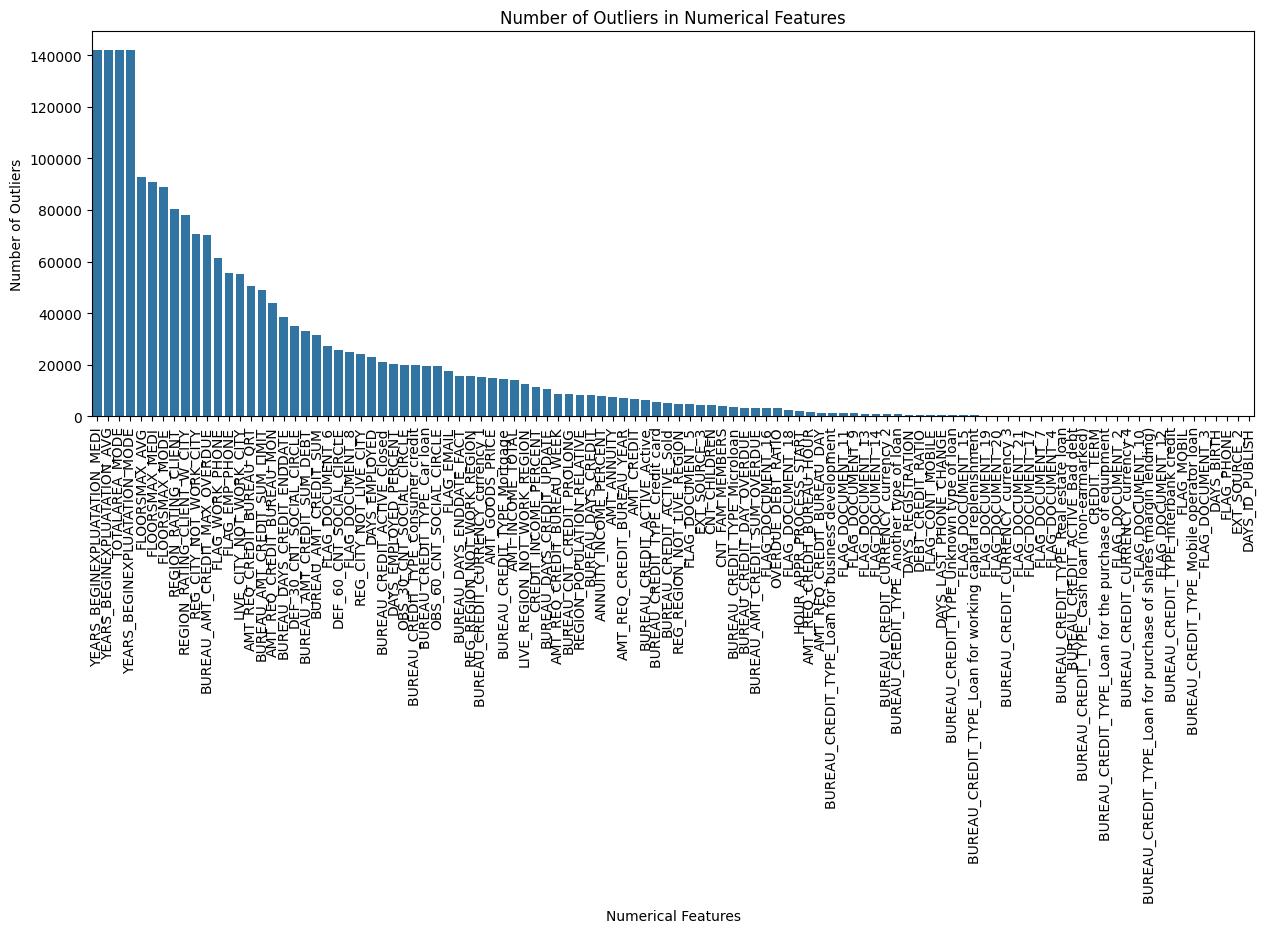

YEARS_BEGINEXPLUATATION_MEDI                                       142141
YEARS_BEGINEXPLUATATION_AVG                                        142016
TOTALAREA_MODE                                                     141917
YEARS_BEGINEXPLUATATION_MODE                                       141861
FLOORSMAX_AVG                                                       92616
FLOORSMAX_MEDI                                                      90884
FLOORSMAX_MODE                                                      88941
REGION_RATING_CLIENT                                                80527
REGION_RATING_CLIENT_W_CITY                                         78027
REG_CITY_NOT_WORK_CITY                                              70867
BUREAU_AMT_CREDIT_MAX_OVERDUE                                       70440
FLAG_WORK_PHONE                                                     61308
FLAG_EMP_PHONE                                                      55386
LIVE_CITY_NOT_WORK_CITY               

In [95]:
# Outlier detection using the IQR method for the numerical features

# Define a function to detect outliers using IQR
def detect_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    outlier_condition = ((data[feature] < (Q1 - 1.5 * IQR)) | (data[feature] > (Q3 + 1.5 * IQR)))
    return data.loc[outlier_condition]

# Applying the function to the sample numerical features
outliers_dict = {}
for feature in numerical_features:
    outliers = detect_outliers_iqr(df_reduced, feature)
    outliers_dict[feature] = outliers.shape[0]

# Convert the dictionary to a pandas series for easy visualization
outliers_series = pd.Series(outliers_dict).sort_values(ascending=False)

# Plotting the number of outliers detected in each feature
plt.figure(figsize=(15, 5))
sns.barplot(x=outliers_series.index, y=outliers_series)
plt.xticks(rotation=90)
plt.ylabel('Number of Outliers')
plt.xlabel('Numerical Features')
plt.title('Number of Outliers in Numerical Features')
plt.show()

outliers_series


## Feature Elimination

In [96]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

def select_k_best_features(X: pd.DataFrame, y: pd.Series, k: int = 10) -> Tuple[pd.DataFrame, SelectKBest]:
    """
    Selects the top k features based on univariate statistical tests.

    Parameters:
    X (pd.DataFrame): Feature matrix.
    y (pd.Series): Target variable.
    k (int): Number of top features to select.

    Returns:
    Tuple[pd.DataFrame, SelectKBest]: Tuple containing the reduced feature matrix and the fitted selector.
    """
    # Initialize and fit SelectKBest
    selector = SelectKBest(score_func=f_classif, k=k)
    X_new = selector.fit_transform(X, y)
    X_new = pd.DataFrame(X_new, columns=X.columns[selector.get_support(indices=True)])
    
    return X_new, selector


In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

def select_from_model_features(X: pd.DataFrame, y: pd.Series, threshold: float = 0.01) -> Tuple[pd.DataFrame, SelectFromModel]:
    """
    Selects features based on importance weights from a model (RandomForestClassifier).

    Parameters:
    X (pd.DataFrame): Feature matrix.
    y (pd.Series): Target variable.
    threshold (float): Threshold value for feature importances.

    Returns:
    Tuple[pd.DataFrame, SelectFromModel]: Tuple containing the reduced feature matrix and the fitted selector.
    """
    # Initialize and fit SelectFromModel
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X, y)
    selector = SelectFromModel(clf, threshold=threshold, prefit=True)
    X_new = selector.transform(X)
    X_new = pd.DataFrame(X_new, columns=X.columns[selector.get_support(indices=True)])
    
    return X_new, selector


In [98]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

def recursive_feature_elimination(X: pd.DataFrame, y: pd.Series, n_features_to_select: int = 10) -> Tuple[pd.DataFrame, RFE]:
    """
    Recursively eliminates features using an estimator (SVR).

    Parameters:
    X (pd.DataFrame): Feature matrix.
    y (pd.Series): Target variable.
    n_features_to_select (int): Number of features to select.

    Returns:
    Tuple[pd.DataFrame, RFE]: Tuple containing the reduced feature matrix and the fitted selector.
    """
    estimator = SVR(kernel="linear")
    selector = RFE(estimator, n_features_to_select=n_features_to_select)
    selector = selector.fit(X, y)
    X_new = selector.transform(X)
    X_new = pd.DataFrame(X_new, columns=X.columns[selector.get_support(indices=True)])
    
    return X_new, selector


In [ ]:
# Assuming df_train is your training data and 'TARGET' is the label
X = df_reduced.drop('TARGET', axis=1)
y = df_reduced['TARGET']

# Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# SelectKBest
X_kbest, selector_kbest = select_k_best_features(X_scaled, y, k=50)

# SelectFromModel
X_from_model, selector_from_model = select_from_model_features(X_scaled, y, threshold=0.01)

# RFE
X_rfe, selector_rfe = recursive_feature_elimination(X_scaled, y, n_features_to_select=20)

# Now, X_kbest, X_from_model, and X_rfe are the feature matrices reduced by each method
